# Problem set 7

## Name: [Yawen Tan]

## Link to your PS7 github repo: [https://github.com/IsabellaTan/Brown-DATA1030-HW7]

### Problem 0 

-2 points for every missing green OK sign. 

Make sure you are in the DATA1030 environment.

In [1]:
from __future__ import print_function
from packaging.version import parse as Version
from platform import python_version

OK = '\x1b[42m[ OK ]\x1b[0m'
FAIL = "\x1b[41m[FAIL]\x1b[0m"

try:
    import importlib
except ImportError:
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % sys.version)

def import_version(pkg, min_ver, fail_msg=""):
    mod = None
    try:
        mod = importlib.import_module(pkg)
        if pkg in {'PIL'}:
            ver = mod.VERSION
        else:
            ver = mod.__version__
        if Version(ver) == Version(min_ver):
            print(OK, "%s version %s is installed."
                  % (lib, min_ver))
        else:
            print(FAIL, "%s version %s is required, but %s installed."
                  % (lib, min_ver, ver))    
    except ImportError:
        print(FAIL, '%s not installed. %s' % (pkg, fail_msg))
    return mod


# first check the python version
pyversion = Version(python_version())

if pyversion >= Version("3.12.10"):
    print(OK, "Python version is %s" % pyversion)
elif pyversion < Version("3.12.10"):
    print(FAIL, "Python version 3.12.10 is required,"
                " but %s is installed." % pyversion)
else:
    print(FAIL, "Unknown Python version: %s" % pyversion)

    
print()
requirements = {'numpy': "2.2.5", 'matplotlib': "3.10.1",'sklearn': "1.6.1", 
                'pandas': "2.2.3",'xgboost': "3.0.0", 'shap': "0.47.2", 
                'polars': "1.27.1", 'seaborn': "0.13.2"}

# now the dependencies
for lib, required_version in list(requirements.items()):
    import_version(lib, required_version)

[ OK ] Python version is 3.12.10

[ OK ] numpy version 2.2.5 is installed.
[ OK ] matplotlib version 3.10.1 is installed.
[ OK ] sklearn version 1.6.1 is installed.
[ OK ] pandas version 2.2.3 is installed.
[ OK ] xgboost version 3.0.0 is installed.
[ OK ] shap version 0.47.2 is installed.
[ OK ] polars version 1.27.1 is installed.
[ OK ] seaborn version 0.13.2 is installed.


### Problem 1a (10 points)

Please load the true_labels_pred_probs.csv file from the data folder into a data frame. It contains the true labels and the predicted probabilities of class 0 and 1 in a classification problem. Class 0 indicates a patient does not have a disease, while Class 1 indicates that a patient does have the disease.

Please prepare the predicted classes for a critical probability of 25%, 50%, and 75% and create three confusion matrix plots. Put the critical probability value in the title of each graph. In a paragraph, explain how the model's performance is impacted by the critical probability with respect to the confusion matrices. Given the model's specified deployment task, what are the implications of choosing one of the critical probabilities over the other?

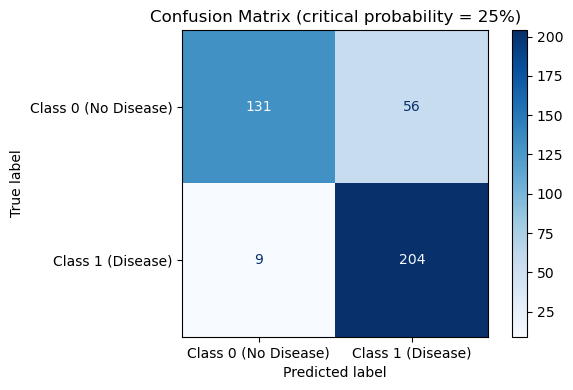

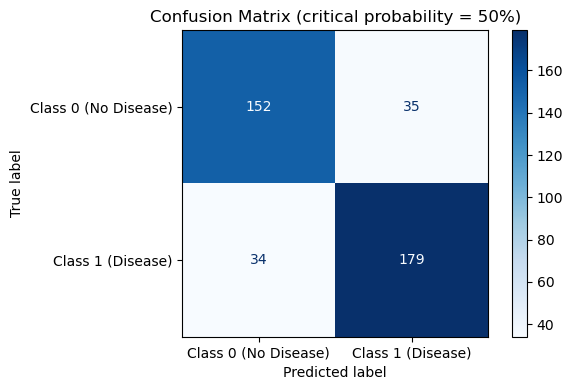

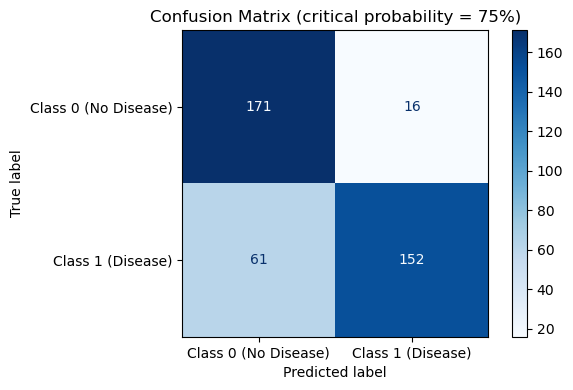

In [9]:
# your code here

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load data
df = pd.read_csv("data/true_labels_pred_probs.csv")
# convert to array format
y_true = np.array(df['y_true'])
# set 3 critical probabilities
thresholds = [0.25, 0.50, 0.75]
# Loop every critical probability
for t in thresholds:
    # get the predictions
    y_pred = (df['pred_prob_class1'] >= t).astype(int)
     # Calculate confusion matrix [[TN, FP], [FN, TP]]
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Class 0 (No Disease)', 'Class 1 (Disease)'])
    fig, ax = plt.subplots(figsize=(6, 4))
    disp.plot(ax=ax, cmap='Blues')
    ax.set_title(f"Confusion Matrix (critical probability = {int(t*100)}%)", fontsize=12)
    plt.tight_layout()
    plt.show()



**your explanation here**

As the critical probability increases from 25% to 75%, the model becomes more conservative in predicting Class 1 (Disease). At 25%, the model almost identifies all diseased patients (TP = 204, FN = 9), but produces many false alarms (FP = 56). This means the model tends to classify more patients as positive, resulting in high recall but low precision. At 50%, the model achieves a relative balance between recall and precision (FP decreases to 35, FN increases to 34). At 75%, the model predicts “disease” only when the estimated probability is very high, yielding the fewest false positives (FP = 16) but the most missed cases (FN = 61). This indicates that precision improves while recall declines. In practical medical deployment, this trade-off has significant implications. For early-stage screening—where missing a true patient is costlier than flagging healthy individuals—a lower threshold (e.g., 25%) is preferable to maximize recall. When testing costs are high or resources are limited, false positives consume valuable capacity, and thus a higher threshold (e.g., 75%) is preferable to enhance precision.

### Problem 1b (9 points)

Calculate and plot the accuracy, precision, recall, f0.5, f1, and f1.5 scores using the sorted values of the Class 1 predicted probabilities.

What critical probability maximizes each of the scores (one critical probability per score)? That critical probability is what you should use to maximize the scores.

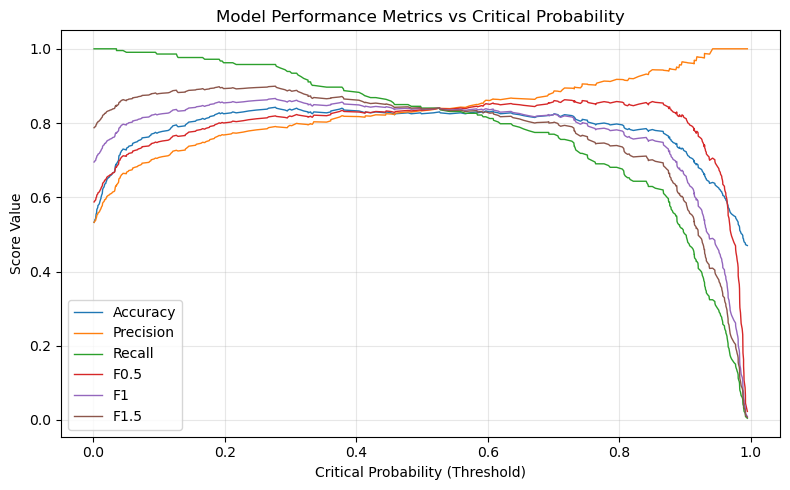

--- Optimal Critical Probability for Each Metric ---
Accuracy: 0.277
Precision: 0.942
Recall: 0.001
F0.5: 0.717
F1: 0.277
F1.5: 0.277


In [13]:
# your code here 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score

y_prob = np.array(df['pred_prob_class1'])
# using the sorted values of the Class 1 predicted probabilities
thresholds = np.sort(np.unique(y_prob))
# create empty list to store
accuracies, precisions, recalls, f05s, f1s, f15s = [], [], [], [], [], []
# Loop every critical probability
for t in thresholds:
    y_pred = (y_prob >= t).astype(int)
    # find accuracy, precision, recall score, f0.5, f1, f1.5
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f05 = fbeta_score(y_true, y_pred, beta=0.5)
    f1 = fbeta_score(y_true, y_pred, beta=1)
    f15 = fbeta_score(y_true, y_pred, beta=1.5)
    # store the result to the list
    accuracies.append(acc)
    precisions.append(prec)
    recalls.append(rec)
    f05s.append(f05)
    f1s.append(f1)
    f15s.append(f15)

# Plot accuracy, precision, recall score, f0.5, f1, f1.5
plt.figure(figsize=(8,5))
plt.plot(thresholds, accuracies, label='Accuracy', linewidth=1)
plt.plot(thresholds, precisions, label='Precision', linewidth=1)
plt.plot(thresholds, recalls, label='Recall', linewidth=1)
plt.plot(thresholds, f05s, label='F0.5', linewidth=1)
plt.plot(thresholds, f1s, label='F1', linewidth=1)
plt.plot(thresholds, f15s, label='F1.5', linewidth=1)
# Label x,y axis
plt.xlabel('Critical Probability (Threshold)')
plt.ylabel('Score Value')
plt.title('Model Performance Metrics vs Critical Probability')
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Find the best threshold for accuracy, precision, recall score, f0.5, f1, f1.5
best_thresholds = {
    'Accuracy': thresholds[np.nanargmax(accuracies)],
    'Precision': thresholds[np.nanargmax(precisions)],
    'Recall': thresholds[np.nanargmax(recalls)],
    'F0.5': thresholds[np.nanargmax(f05s)],
    'F1': thresholds[np.nanargmax(f1s)],
    'F1.5': thresholds[np.nanargmax(f15s)]
}

# Print the result
print("--- Optimal Critical Probability for Each Metric ---")
for metric, t in best_thresholds.items():
    print(f"{metric}: {t:.3f}")



### Problem 1c (3 points)

One of the curves you plotted is non-decreasing and another curve is non-increasing. Which evaluation metrics correspond to these two curves and why is this a problem when you try to tune the critical probability? Explain your answer in a few sentences.


**your explanation here**

Based on the plot, precision is the non-decreasing metric and recall is the non-increasing one. As the critical probability increases, the model becomes more conservative in predicting the positive class: fewer samples are labeled as positive, which reduces false positives and therefore increases precision. However, this same change inevitably increases false negatives, causing recall to decline. This monotonic behavior creates a challenge when tuning the critical probability. Because precision only increases and recall only decreases, neither metric provides a clear maximum threshold which means there is no single point that simultaneously optimizes both. To overcome this issue, combined metrics such as the F-score are used, as they incorporate both precision and recall to identify a balanced threshold.



### Problem 2a (5 points)

Work with true_labels_pred_probs.csv again. 

Calculate the points on the ROC curve and plot it. 

Print out the best critical probability by finding the point on the ROC curve that's closest to the perfect classifier (0,1) point. 

Check out the wikipedia page of the [ROC curve](https://en.wikipedia.org/wiki/Receiver_operating_characteristic#Further_interpretations) to read more about other ways to determine the best critical probability, and other ways to summarize the ROC curve.

In [ ]:
# your code here 

### Problem 2b (10 points)

We discussed in class that the baseline accuracy of a classification model is equal to the fraction of points that belong to the most populous class. For example, if 80% of points belong to class 0 and 20% of points belong to class 1, we could predict class 0 for all points and the accuracy of our model would be 80%. In general, the baseline score is the best score you can achieve knowing no additional information about the features. You use information about your target variable only (in this case, only what percent of points are in each class). Keep this concept and methodology in mind and answer the questions below.

Q1: How do you calculate the baseline f1 score in classification? Let's assume $n_0$ points are in class 0 and $n_1 = n - n_0$ points are in class 1 where $n$ is the number of points in your dataset, and $n_0 > n_1$ so class 1 is the minority class. Work out the solution on pen and paper. Express the f1 score using $p$ (precision) and/or $r$ (recall).

**your explanation here**

Q2: Generalize your Q1 solution to the f_beta score. Usually the f_beta score is used when the classification problem is imbalanced. Prepare a figure which shows the baseline f_beta score for beta = 0.5, 1, and 2 when the fraction of points that belong to class 0 is between 0.95 and 1 in the target variable. Use 51 linearly spaced values between 0.95 and 1.
Create a plot with three curves, one curve per beta value. Don't forget to add axes labels, a title, and a legend.

In [ ]:
# your code here

### Problem 2c (10 points)

So far, we've discussed calculating f1 scores in binary classification problems. However, for multiclass problems, there are multiple ways to calculate an f1 score. Look up three different approaches and explain how to calculate them in a short description with equations. Create a simple toy dataset and calculate the f1 scores using sklearn. Discuss the pros and cons of each approach.

**your explanation here**

In [ ]:
# your code here

### Problem 3 (5 points)

The true and predicted target variables of a regression problem are available in the `data/reg.cvs`. The goal of the model is to predict people's ages so the target variable's unit is year. 

We discussed the R2 score in class:

$R^2(y,y') = 1 - \frac{\sum_{i=1}^{n}(y_i-y_i')^2}{\sum_{i=1}^{n}(y_i-\bar{y})^2}$,
where $\bar{y}$ is the mean of $y$.

The baseline (or constant) regression model returns the mean of $y$ as prediction for all data points ($y_i' == \bar{y}$ for all $i$). So the baseline R2 score is 0.

Calculate and print the baseline R2, MSE, RMSE, and MAE, **assuming that $y_i' == \bar{y}$ for all $i$**. Make sure to include the units for each metric. 

Next, calculate and print the R2 score, MSE, RMSE, and MAE **using the model predictions** and add the units of the metrics.

In [ ]:
# your code here